In [1]:
import pandas as pd
import pickle
import numpy as np
# Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import  GridSearchCV


In [2]:
with open('cars.pkl', 'rb') as carpickle:
    cars_df=pickle.load(carpickle)

In [3]:
cars_df['year'].max(), cars_df['odometer'].max()

(2.1397818404722577, 6.866559459621692)

In [3]:
# with open('cars_witthout_drive_size_paint_NaN.pkl', 'rb') as carpickles:
#     cars_limited_df=pickle.load(carpickles)

In [3]:
X= cars_df.drop(['model','price'], axis=1)
y= cars_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
print(dummy_regr.score(X_train, y_train))
print(dummy_regr.score(X_test, y_test))

0.0
-0.00015924886381046832


In [5]:
integers = cars_df[['odometer','price', 'year']]

<AxesSubplot:>

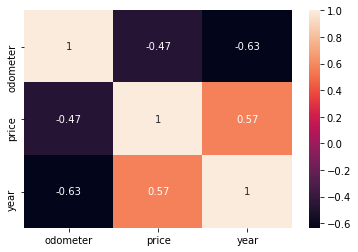

In [6]:
import seaborn as sns
corr = integers.corr(method='pearson')
sns.heatmap(corr, annot=True)

In [7]:
simple_df = pd.concat([cars_df['price'], cars_df['year']], axis=1)
X_simple = simple_df.drop('price', axis=1)
y_simple = simple_df['price']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y_simple, test_size=.2, random_state=42)
SimpleSimpleLinearRegression = LinearRegression()
SimpleSimpleLinearRegression.fit(X_train_s, y_train_s)
print(SimpleSimpleLinearRegression.score(X_train_s, y_train_s))

print(SimpleSimpleLinearRegression.score(X_test_s, y_test_s))


y_hat_train_s = np.exp(SimpleSimpleLinearRegression.predict(X_train_s))
y_hat_test_s = np.exp(SimpleSimpleLinearRegression.predict(X_test_s))
train_mse_s = mean_squared_error(np.exp(y_train_s), y_hat_train_s)
test_mse_s = mean_squared_error(np.exp(y_test_s), y_hat_test_s)
test_rmse_s = np.sqrt(test_mse_s)
print('Train Mean Squarred Error:', train_mse_s)
print('Test Mean Squarred Error:', test_mse_s)
print('Test RMSE: ', test_rmse_s)

0.3250902942556946
0.3270986539314874
Train Mean Squarred Error: 97139077.8418655
Test Mean Squarred Error: 95377911.162922
Test RMSE:  9766.161536802572


In [8]:
X= cars_df.drop(['model','price'], axis=1)
y= cars_df['price']
X_train_SL, X_test_SL, y_train_SL, y_test_SL = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# dt_cv =cross_val_score(SimpleLinearRegression,X_train,y_train )
# dt_cv

In [10]:
SimpleLinearRegression = LinearRegression()
SimpleLinearRegression.fit(X_train_SL, y_train_SL)
print(SimpleLinearRegression.score(X_train_SL,y_train_SL))

print(SimpleLinearRegression.score(X_test_SL, y_test_SL))

y_hat_train_s = np.exp(SimpleLinearRegression.predict(X_train_SL))
y_hat_test_s = np.exp(SimpleLinearRegression.predict(X_test_SL))
train_mse_s = mean_squared_error(np.exp(y_train_SL), y_hat_train_s)
test_mse_s = mean_squared_error(np.exp(y_test_SL), y_hat_test_s)
test_rmse_s = np.sqrt(test_mse_s)
print('Train Mean Squarred Error:', train_mse_s)
print('Test Mean Squarred Error:', test_mse_s)
print('Test RMSE: ', test_rmse_s)

0.6438537485047916
0.6453226255625695
Train Mean Squarred Error: 35637273.42204408
Test Mean Squarred Error: 35554498.01104934
Test RMSE:  5962.759261537341


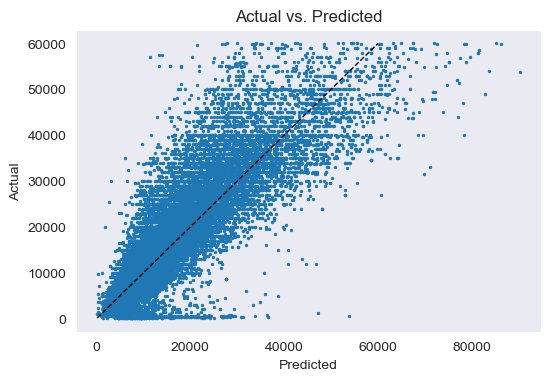

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

y_prediction = y_hat_test_s
y_actual = np.exp(y_test_SL)
act_fig, ax = plt.subplots(dpi=100)
sns.set_style("dark")
ax.scatter(y_prediction, y_actual, s = 2)
ax.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'k--', lw=1)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.title('Actual vs. Predicted')
ax.ticklabel_format(style='plain');

In [11]:
X_train_L, X_test_L, y_train_L, y_test_L = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
Lasso_Linear_Regression = Lasso(random_state=42)
Lasso_Linear_Regression.fit(X_train_L, y_train_L)
print(Lasso_Linear_Regression.score(X_train_L,y_train_L))

print(Lasso_Linear_Regression.score(X_test_L,y_test_L))

y_hat_trainl = np.exp(Lasso_Linear_Regression.predict(X_train_L))
y_hat_testl = np.exp(Lasso_Linear_Regression.predict(X_test_L))
train_mse_sl = mean_squared_error(np.exp(y_train_L), y_hat_trainl)
test_mse_sl = mean_squared_error(np.exp(y_test_L), y_hat_testl)
test_rmse_sl = np.sqrt(test_mse_sl)
print('Train Mean Squarred Error:', train_mse_sl)
print('Test Mean Squarred Error:', test_mse_sl)
print('Test RMSE: ', test_rmse_sl)

0.0
-0.00015924886381046832
Train Mean Squarred Error: 160141966.90884575
Test Mean Squarred Error: 157781524.08811224
Test RMSE:  12561.111578523305


In [13]:
X_train_R, X_test_R, y_train_R, y_test_R = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
Ridge_Linear_Regression = Ridge(random_state=42)
Ridge_Linear_Regression.fit(X_train_R, y_train_R)
print(Ridge_Linear_Regression.score(X_train_R,y_train_R))

print(Ridge_Linear_Regression.score(X_test_R,y_test_R))

y_hat_trainr = np.exp(Ridge_Linear_Regression.predict(X_train_R))
y_hat_testr = np.exp(Ridge_Linear_Regression.predict(X_test_R))
train_mse_sr = mean_squared_error(np.exp(y_train_R), y_hat_trainr)
test_mse_sr = mean_squared_error(np.exp(y_test_R), y_hat_testr)
test_rmse_sr = np.sqrt(test_mse_sr)
print('Train Mean Squarred Error:', train_mse_sr)
print('Test Mean Squarred Error:', test_mse_sr)
print('Test RMSE: ', test_rmse_sr)

0.6438525253840197
0.6453221190252898
Train Mean Squarred Error: 35633315.10835195
Test Mean Squarred Error: 35554842.65163288
Test RMSE:  5962.788160888569


In [18]:
# Best parameters are {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 100}

Train Mean Squarred Error: 0.25382441540217154
Test Mean Squarred Error: 0.2533258930515902
Test RMSE:  0.5033149044600111


In [27]:

# grid = {

     
#      'fit_intercept':[True, False],
#     'normalize': [False,True],
#     'copy_X': [True,False],



# }
# gs = GridSearchCV(estimator=SimpleLinearRegression , param_grid=grid, cv=2)
# gs.fit(X_train, y_train)
# print(f'Best parameters are {gs.best_params_}')
# print(f'Best score {gs.best_score_}')
# print(f'Best estimator score {gs.best_estimator_.score(X_test, y_test)}')

Best parameters are {'copy_X': True, 'fit_intercept': False, 'normalize': False}
Best score -942228332950418.2
Best estimator score -601543519717666.4


In [ ]:
# Best parameters are {'copy_X': True, 'fit_intercept': False, 'normalize': False}

In [15]:
X_train_TL, X_test_TL, y_train_TL, y_test_TL = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
TunedLR = LinearRegression(fit_intercept=False)
TunedLR.fit(X_train_TL, y_train_TL)
print(TunedLR.score(X_train_TL, y_train_TL))

print(TunedLR.score(X_test_TL, y_test_TL))


y_hat_train_TLR = np.exp(TunedLR.predict(X_train_TL))
y_hat_test_TLR = np.exp(TunedLR.predict(X_test_TL))
train_mse_TLR = mean_squared_error(np.exp(y_train_TL), y_hat_train_TLR)
test_mse_TLR = mean_squared_error(np.exp(y_test_TL), y_hat_test_TLR)
test_rmse_TLR = np.sqrt(test_mse_TLR)
print('Train Mean Squarred Error:', train_mse_TLR)
print('Test Mean Squarred Error:', test_mse_TLR)
print('Test RMSE: ', test_rmse_TLR)

0.6438540579228662
0.6453236478591424
Train Mean Squarred Error: 35635059.083308876
Test Mean Squarred Error: 35552204.98566145
Test RMSE:  5962.566979553475


In [30]:

# grid2 = {

     
#      'alpha':[.1,.5,.7,1.0],
#     'fit_intercept': [True,False],
#     'normalize': [True,False],
#     'precompute':[True,False],
#     'copy_X':[True,False],
#     'max_iter':[100, 500,1000]
   



# }
# gs2 = GridSearchCV(estimator=Lasso_Linear_Regression , param_grid=grid2, cv=2)
# gs2.fit(X_train, y_train)
# print(f'Best parameters are {gs2.best_params_}')
# print(f'Best score {gs2.best_score_}')
# print(f'Best estimator score {gs2.best_estimator_.score(X_test, y_test)}')

C:\Users\roger\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1305.7959283890668, tolerance: 542.8254095829221
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\roger\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1536.2531224264822, tolerance: 543.0164360414485
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\roger\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1305.795928388252, tolerance: 542.8254095829222
  model = cd_fast.enet_coordinate_descent(
C:\Users\roger\anaconda3\envs\learn-env\lib\site-pac

Best parameters are {'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 100, 'normalize': False, 'precompute': True}
Best score 0.4054300816594601
Best estimator score 0.4056872580958133


In [ ]:
# {'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 100, 'normalize': False, 'precompute': True

In [17]:
TunedLLR = Lasso(alpha=.1, max_iter=100, precompute=False, random_state=42)
TunedLLR.fit(X_train, y_train)
print(TunedLLR.score(X_train,y_train))

print(TunedLLR.score(X_test,y_test))

y_hat_train_LLR = np.exp(TunedLLR.predict(X_train))
y_hat_test_LLR = np.exp(TunedLLR.predict(X_test))
train_mse_LLR = mean_squared_error(np.exp(y_train), y_hat_train_LLR)
test_mse_LLR = mean_squared_error(np.exp(y_test), y_hat_test_LLR)
test_rmse_LLR = np.sqrt(test_mse_LLR)
print('Train Mean Squarred Error:', train_mse_LLR)
print('Test Mean Squarred Error:', test_mse_LLR)
print('Test RMSE: ', test_rmse_LLR)

0.4207458529844228
0.42337565050024306
Train Mean Squarred Error: 85950908.92473215
Test Mean Squarred Error: 84239892.6557851
Test RMSE:  9178.229276706106


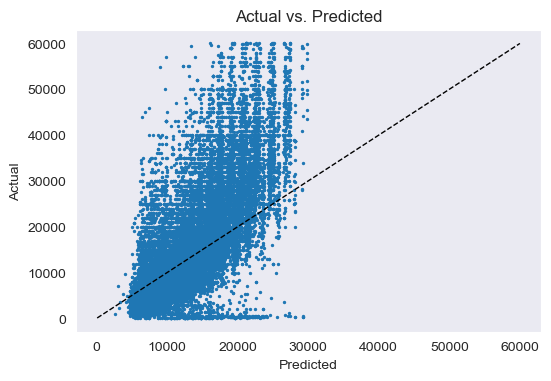

In [31]:
y_predictionL = y_hat_test_LLR
y_actualL = np.exp(y_test)
act_fig, ax = plt.subplots(dpi=100)
sns.set_style("dark")
ax.scatter(y_predictionL, y_actualL, s = 2)
ax.plot([y_actualL.min(), y_actualL.max()], [y_actualL.min(), y_actualL.max()], 'k--', lw=1)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.title('Actual vs. Predicted')
ax.ticklabel_format(style='plain');

In [8]:

# grid3 = {

     
#      'alpha':[.1,.5,.7,1.0],
#     'fit_intercept': [True,False],
#     'copy_X':[True,False],
#     'max_iter':[100, 500,1000]
   



# }
# gs3 = GridSearchCV(estimator=Ridge_Linear_Regression , param_grid=grid3, cv=2)
# gs3.fit(X_train, y_train)
# print(f'Best parameters are {gs3.best_params_}')
# print(f'Best score {gs3.best_score_}')
# print(f'Best estimator score {gs3.best_estimator_.score(X_test, y_test)}')

Best parameters are {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 100}
Best score 0.6336809696017588
Best estimator score 0.6474771204261676


In [ ]:
# Best parameters are {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 100}

In [18]:
TunedRLR = Ridge(max_iter=100, random_state=42)
TunedRLR.fit(X_train, y_train)
print(TunedRLR.score(X_train,y_train))

print(TunedRLR.score(X_test,y_test))

y_hat_train_RLR = np.exp(TunedRLR.predict(X_train))
y_hat_test_RLR = np.exp(TunedRLR.predict(X_test))
train_mse_RLR = mean_squared_error(np.exp(y_train), y_hat_train_RLR)
test_mse_RLR = mean_squared_error(np.exp(y_test), y_hat_test_RLR)
test_rmse_RLR = np.sqrt(test_mse_RLR)
print('Train Mean Squarred Error:', train_mse_RLR)
print('Test Mean Squarred Error:', test_mse_RLR)
print('Test RMSE: ', test_rmse_RLR)

0.6438525253840197
0.6453221190252898
Train Mean Squarred Error: 35633315.10835195
Test Mean Squarred Error: 35554842.65163288
Test RMSE:  5962.788160888569


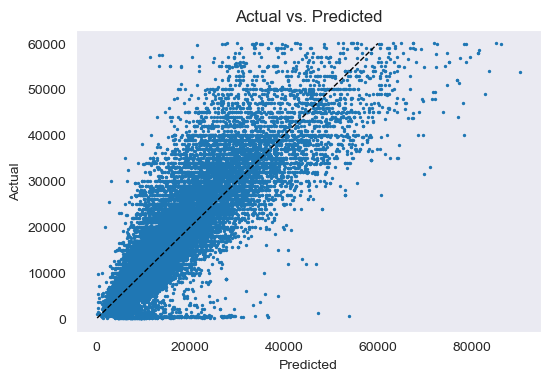

In [32]:
y_predictionR = y_hat_test_s
y_actualR = np.exp(y_test_SL)
act_fig, ax = plt.subplots(dpi=100)
sns.set_style("dark")
ax.scatter(y_predictionR, y_actualR, s = 2)
ax.plot([y_actualR.min(), y_actualR.max()], [y_actualR.min(), y_actualR.max()], 'k--', lw=1)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.title('Actual vs. Predicted')
ax.ticklabel_format(style='plain');

In [19]:
xgboost = xgb.XGBRegressor(random_state=42)
xgboost.fit(X_train, y_train)

print(xgboost.score(X_train, y_train))

print(xgboost.score(X_test, y_test))

y_hat_trainXG = np.exp(xgboost.predict(X_train))
y_hat_testXG = np.exp(xgboost.predict(X_test))
train_mseXG = mean_squared_error(np.exp(y_train), y_hat_trainXG)
test_mseXG = mean_squared_error(np.exp(y_test), y_hat_testXG)
test_rmseXG = np.sqrt(test_mseXG)
print('Train Mean Squarred Error:', train_mseXG)
print('Test Mean Squarred Error:', test_mseXG)
print('Test RMSE: ', test_rmseXG)

0.7958511580692986
0.7612437435771685
Train Mean Squarred Error: 19460596.19741704
Test Mean Squarred Error: 22087049.62553763
Test RMSE:  4699.686119895416


In [19]:
# grid4 = {

#      'base_score':[.6,.7, 1],
#      'n_estimators': [90,100, 110],
#      'max_depth' : [5,6,7,10]
# }
# gs4= GridSearchCV(estimator=xgboost , param_grid=grid4, cv=5)
# gs4.fit(X_train, y_train)
# print(f'Best parameters are {gs4.best_params_}')
# print(f'Best score {gs4.best_score_}')
# print(f'Best estimator score {gs4.best_estimator_.score(X_test, y_test)}')

In [20]:
TunedXG = xgb.XGBRegressor(n_estimators = 100, max_depth = 7, base_score =.6,random_state=42)
TunedXG.fit(X_train, y_train)
print(TunedXG.score(X_train,y_train))

print(TunedXG.score(X_test,y_test))

y_hat_train_TXG = np.exp(TunedXG.predict(X_train))
y_hat_test_TXG = np.exp(TunedXG.predict(X_test))
train_mse_TXG = mean_squared_error(np.exp(y_train), y_hat_train_TXG)
test_mse_TXG = mean_squared_error(np.exp(y_test), y_hat_test_TXG)
test_rmse_TXG = np.sqrt(test_mse_TXG)
print('Train Mean Squarred Error:', train_mse_TXG)
print('Test Mean Squarred Error:', test_mse_TXG)
print('Test RMSE: ', test_rmse_TXG)

0.8321493387264695
0.7772718292467858
Train Mean Squarred Error: 17030886.79493091
Test Mean Squarred Error: 20450395.73558834
Test RMSE:  4522.211376703696


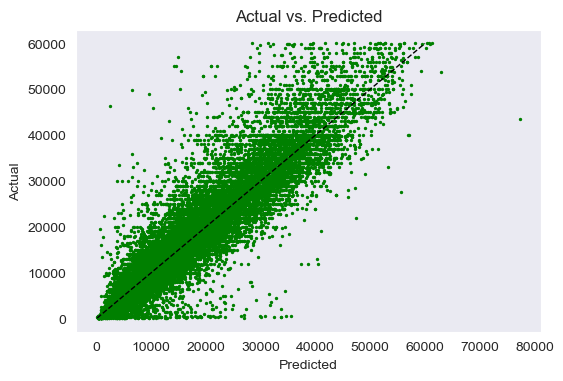

In [97]:
y_predictionXG = y_hat_test_TXG
y_actualXG = np.exp(y_test)
act_fig, ax = plt.subplots(dpi=100)
sns.set_style("dark")
ax.scatter(y_predictionXG, y_actualXG,c='green', s = 2)
ax.plot([y_actualXG.min(), y_actualXG.max()], [y_actualXG.min(), y_actualXG.max()], 'k--', lw=1)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.title('Actual vs. Predicted')
ax.ticklabel_format(style='plain');

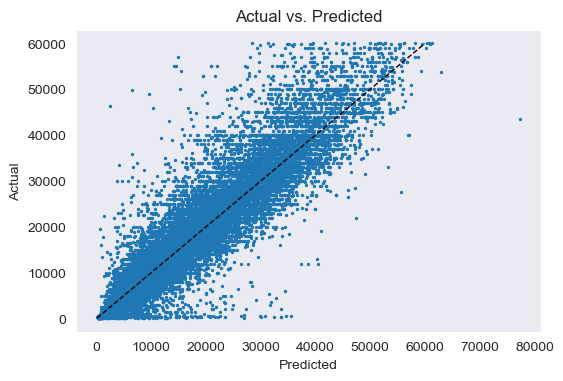

In [89]:
y_predictionXG = y_hat_test_TXG
y_actualXG = np.exp(y_test)
act_fig, ax = plt.subplots(dpi=100)
sns.set_style("dark")
ax.scatter(y_predictionXG, y_actualXG, s = 2)
ax.plot([y_actualXG.min(), y_actualXG.max()], [y_actualXG.min(), y_actualXG.max()], 'k--', lw=1)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.title('Actual vs. Predicted')
ax.ticklabel_format(style='plain');

In [21]:
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)

print(random_forest.score(X_train, y_train))

print(random_forest.score(X_test, y_test))

y_hat_trainRF = np.exp(random_forest.predict(X_train))
y_hat_testRF = np.exp(random_forest.predict(X_test))
train_mseRF = mean_squared_error(np.exp(y_train), y_hat_trainRF)
test_mseRF = mean_squared_error(np.exp(y_test), y_hat_testRF)
test_rmseRF = np.sqrt(test_mseRF)
print('Train Mean Squarred Error:', train_mseRF)
print('Test Mean Squarred Error:', test_mseRF)
print('Test RMSE: ', test_rmseRF)

0.9734623453943482
0.8227030558408935
Train Mean Squarred Error: 2518417.3759707543
Test Mean Squarred Error: 13872179.297944333
Test RMSE:  3724.537460939859


In [24]:
np.exp(random_forest.predict(X_test.head(1)))

array([2394.85039528])

In [26]:
np.exp(y_test.head(1))

213364    6422.0
Name: price, dtype: float64

In [112]:
np.exp(y_test.head(1))

56176    17495.0
Name: price, dtype: float64

In [52]:
X_test.columns[96:115]

Index(['paint_color_grey', 'paint_color_orange', 'paint_color_purple',
       'paint_color_red', 'paint_color_silver', 'paint_color_white',
       'paint_color_yellow', 'state_ak', 'state_al', 'state_ar', 'state_az',
       'state_ca', 'state_co', 'state_ct', 'state_dc', 'state_de', 'state_fl',
       'state_ga', 'state_hi'],
      dtype='object')

In [83]:
input_data = pd.DataFrame(columns=X_test.columns)
input_data

,year,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy


In [84]:
input_datas =pd.DataFrame(columns=X_test.columns)

In [85]:
inputss = {'year': 1.5869, 'odometer':-1.52154, 'manufacturer_audi':1}
inputs= {'year': 1.5869, 'odometer':-1.52154, 'manufacturer_audi':1, 'cylinders_4 cylinders':1, 'title_status_clean':1, 'drive_4wd':1, 'type_sedan':1, 'paint_color_white':1, 'state_ny':1}

In [86]:
input_data = input_data.append(inputs, ignore_index=True)
input_data =input_data.fillna(0)
input_datas =input_datas.append(inputss, ignore_index=True)
input_datas =input_datas.fillna(0)

In [87]:
input_datas

,year,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,1.5869,-1.52154,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
np.exp(random_forest.predict(input_data)) , np.exp(random_forest.predict(input_datas))

(array([6767.79989575]), array([34665.42500574]))

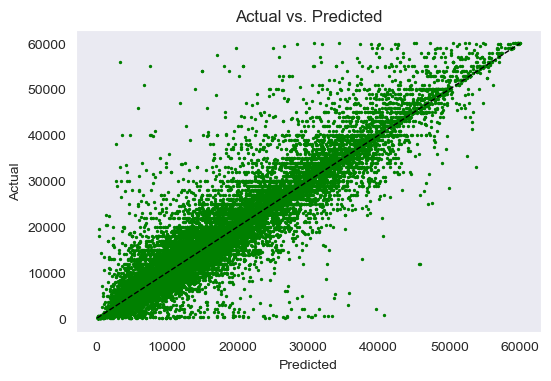

In [101]:
y_predictionrf = y_hat_testRF
y_actualrf = np.exp(y_test)
act_fig, ax = plt.subplots(dpi=100)
sns.set_style("dark")
ax.scatter(y_predictionrf, y_actualrf,c='green', s = 2)
ax.plot([y_actualrf.min(), y_actualrf.max()], [y_actualrf.min(), y_actualrf.max()], 'k--', lw=1)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.title('Actual vs. Predicted')
ax.ticklabel_format(style='plain');

In [32]:
# grid5 = { 
# #     'n_estimators': [90,95,100],
# #     'criterion': ['mse', 'mae'],
#     'max_depth':[7,8,9]

# }
# gs5= GridSearchCV(estimator=xgboost , param_grid=grid5, cv=5)
# gs5.fit(X_train, y_train)
# print(f'Best parameters are {gs5.best_params_}')
# print(f'Best score {gs5.best_score_}')
# print(f'Best estimator score {gs5.best_estimator_.score(X_test, y_test)}')

Best parameters are {'max_depth': 9}
Best score 0.797313092216383
Best estimator score 0.8076937479912851


In [ ]:
Best parameters are {'criterion': 'mse', 'max_depth': 7, 'n_estimators': 100}

In [22]:
TunedRF = RandomForestRegressor(max_depth=9,random_state=42)
TunedRF.fit(X_train, y_train)
print(TunedRF.score(X_train,y_train))

print(TunedRF.score(X_test,y_test))

y_hat_train_TRF = np.exp(TunedRF.predict(X_train))
y_hat_test_TRF = np.exp(TunedRF.predict(X_test))
train_mse_TRF = mean_squared_error(np.exp(y_train), y_hat_train_TRF)
test_mse_TRF = mean_squared_error(np.exp(y_test), y_hat_test_TRF)
test_rmse_TRF = np.sqrt(test_mse_TRF)
print('Train Mean Squarred Error:', train_mse_TRF)
print('Test Mean Squarred Error:', test_mse_TRF)
print('Test RMSE: ', test_rmse_TRF)

0.6980234215362835
0.6790243524358708
Train Mean Squarred Error: 30241891.819373064
Test Mean Squarred Error: 31341512.333056904
Test RMSE:  5598.349072097675


In [23]:
nueral_network = MLPRegressor(random_state=42, verbose=True)
nueral_network.fit(X_train, y_train)

print(nueral_network.score(X_train, y_train))

print(nueral_network.score(X_test, y_test))

y_hat_train_nn = np.exp(nueral_network.predict(X_train))
y_hat_test_nn = np.exp(nueral_network.predict(X_test))
train_mse_nn = mean_squared_error(np.exp(y_train), y_hat_train_nn)
test_mse_nn = mean_squared_error(np.exp(y_test), y_hat_test_nn)
test_rmse_nn = np.sqrt(test_mse_nn)
print('Train Mean Squarred Error:', train_mse_nn)
print('Test Mean Squarred Error:', test_mse_nn)
print('Test RMSE: ', test_rmse_nn)

Iteration 1, loss = 2.63932671
Iteration 2, loss = 0.12702152
Iteration 3, loss = 0.12233311
Iteration 4, loss = 0.11933633
Iteration 5, loss = 0.11573975
Iteration 6, loss = 0.11142845
Iteration 7, loss = 0.10707132
Iteration 8, loss = 0.10360706
Iteration 9, loss = 0.10090035
Iteration 10, loss = 0.09922450
Iteration 11, loss = 0.09645783
Iteration 12, loss = 0.09493892
Iteration 13, loss = 0.09338703
Iteration 14, loss = 0.09230605
Iteration 15, loss = 0.09073090
Iteration 16, loss = 0.08973349
Iteration 17, loss = 0.08909618
Iteration 18, loss = 0.08813970
Iteration 19, loss = 0.08695983
Iteration 20, loss = 0.08669785
Iteration 21, loss = 0.08569487
Iteration 22, loss = 0.08479657
Iteration 23, loss = 0.08469603
Iteration 24, loss = 0.08414103
Iteration 25, loss = 0.08357535
Iteration 26, loss = 0.08323556
Iteration 27, loss = 0.08274858
Iteration 28, loss = 0.08254176
Iteration 29, loss = 0.08237044
Iteration 30, loss = 0.08187007
Iteration 31, loss = 0.08159772
Iteration 32, los

C:\Users\roger\anaconda3\envs\learn-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8304912759469802
0.7309316882664962
Train Mean Squarred Error: 18675044.82837997
Test Mean Squarred Error: 25362095.69420056
Test RMSE:  5036.079397130327


In [ ]:
# grid = {

     
#      'solver':['lbfgs', 'adam'],
#     'alpha':[.001,.01],
#     'max_iter':[50,100],
#      'verbose':[True],

# }
# gs= GridSearchCV(estimator=nueral_network , param_grid=grid, cv=2)
# gs.fit(X_train, y_train)
# print(f'Best parameters are {gs.best_params_}')
# print(f'Best score {gs.best_score_}')
# print(f'Best estimator score {gs.best_estimator_.score(X_test, y_test)}')

In [24]:
TunedNN = MLPRegressor(alpha= 0.01, max_iter= 50, solver= 'adam', verbose= True, random_state=42)
TunedNN.fit(X_train, y_train)
print(TunedNN.score(X_train,y_train))

print(TunedNN.score(X_test,y_test))

y_hat_train_NN = np.exp(TunedNN.predict(X_train))
y_hat_test_NN = np.exp(TunedNN.predict(X_test))
train_mse_NN = mean_squared_error(np.exp(y_train), y_hat_train_NN)
test_mse_NN = mean_squared_error(np.exp(y_test), y_hat_test_NN)
test_rmse_NN = np.sqrt(test_mse_NN)
print('Train Mean Squarred Error:', train_mse_NN)
print('Test Mean Squarred Error:', test_mse_NN)
print('Test RMSE: ', test_rmse_NN)

Iteration 1, loss = 2.64144820
Iteration 2, loss = 0.13125797
Iteration 3, loss = 0.12857085
Iteration 4, loss = 0.12356930
Iteration 5, loss = 0.11922683
Iteration 6, loss = 0.11453456
Iteration 7, loss = 0.11054957
Iteration 8, loss = 0.10770727
Iteration 9, loss = 0.10536370
Iteration 10, loss = 0.10397041
Iteration 11, loss = 0.10163426
Iteration 12, loss = 0.10047924
Iteration 13, loss = 0.09916111
Iteration 14, loss = 0.09830676
Iteration 15, loss = 0.09702253
Iteration 16, loss = 0.09624024
Iteration 17, loss = 0.09583645
Iteration 18, loss = 0.09493197
Iteration 19, loss = 0.09404993
Iteration 20, loss = 0.09373314
Iteration 21, loss = 0.09295001
Iteration 22, loss = 0.09216390
Iteration 23, loss = 0.09219021
Iteration 24, loss = 0.09176772
Iteration 25, loss = 0.09119345
Iteration 26, loss = 0.09085784
Iteration 27, loss = 0.09045567
Iteration 28, loss = 0.09038904
Iteration 29, loss = 0.09035199
Iteration 30, loss = 0.08969406
Iteration 31, loss = 0.08956303
Iteration 32, los

C:\Users\roger\anaconda3\envs\learn-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7822158328202053
0.7448344762967434
Train Mean Squarred Error: 22592917.86572118
Test Mean Squarred Error: 25429310.914358865
Test RMSE:  5042.748349299107


In [25]:
regression_score = pd.DataFrame(index=['Linear', 'Lasso', 'Ridge', 'XGBoost', 'Neural_NetWork', 'Random_forest'], columns=['test R^2'])
regression_score['test R^2'] = [SimpleLinearRegression.score(X_test_SL,y_test_SL),
                                Lasso_Linear_Regression.score(X_test_L,y_test_L),
                                Ridge_Linear_Regression.score(X_test_R,y_test_R),
                                xgboost.score(X_test, y_test),
                                nueral_network.score(X_test, y_test),
                                random_forest.score(X_test, y_test)]


In [26]:
model_score_fig, ax = plt.subplots(figsize=(12,6))
sns.set_style("dark")

ax.bar(regression_score.index, regression_score['test R^2'], color=["grey", "red", "grey", "grey", "grey",'green'])
plt.title('Model Progression', size=20)
plt.xlabel('Modeling Algorithm', size=15)
plt.ylabel('Test R^2', size=15);
# plt.savefig('images/model_prog.png', bbox_inches = 'tight');

NameError: name 'plt' is not defined

In [46]:
regression_score_tuned = pd.DataFrame(index=['Linear-Tuned', 'Lasso-Tuned', 'Ridge-Tuned', 'XGBoost-Tuned', 'Neural_NetWork-Tuned', 'Random_Forest-Tuned'], columns=['test R^2'])
regression_score_tuned['test R^2'] = [TunedLR.score(X_test_TL, y_test_TL),
                                TunedLLR.score(X_test,y_test),
                                TunedRLR.score(X_test,y_test),
                                TunedXG.score(X_test,y_test),
                                TunedNN.score(X_test,y_test),
                                TunedRF.score(X_test,y_test)]

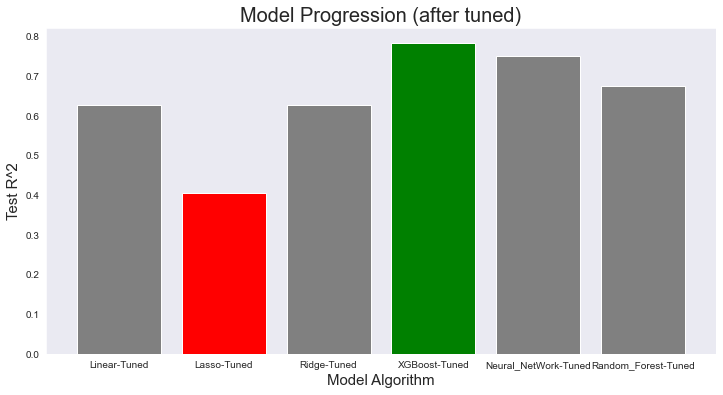

In [55]:
model_score_figT, ax = plt.subplots(figsize=(12,6))
sns.set_style("dark")

ax.bar(regression_score_tuned.index, regression_score_tuned['test R^2'], color=["grey", "red", "grey", "green", "grey",'grey'])
plt.title('Model Progression (after tuned)', size=20)
plt.xlabel('Model Algorithm', size=15)
plt.ylabel('Test R^2', size=15);

In [69]:
rsme = pd.DataFrame(index=['Linear', 'Lasso', 'Ridge', 'XGBoost', 'Neural_NetWork', 'Random_Forest'], columns=['RSME'])
rsme['RSME'] = [test_rmse_s, test_rmse_sl,test_rmse_sr,test_rmseXG,test_rmse_nn,test_rmseRF]


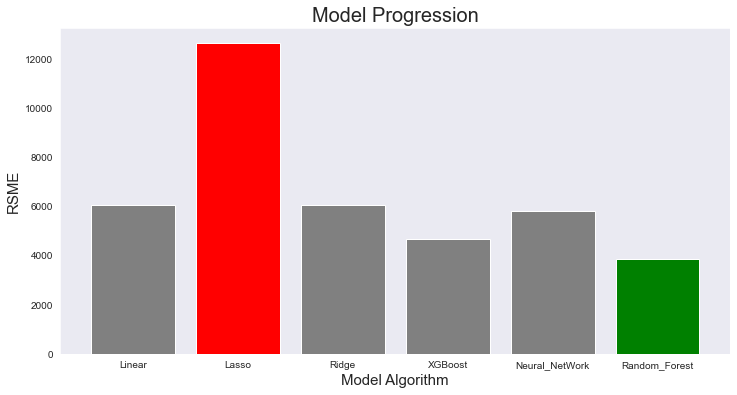

In [70]:
rsmev, ax = plt.subplots(figsize=(12,6))
sns.set_style("dark")

ax.bar(rsme.index, rsme['RSME'], color=["grey", "red", "grey", "grey", "grey",'green'])
plt.title('Model Progression', size=20)
plt.xlabel('Model Algorithm', size=15)
plt.ylabel('RSME', size=15);

In [60]:
rsme_tuned = pd.DataFrame(index=['Linear-Tuned', 'Lasso-Tuned', 'Ridge-Tuned', 'XGBoost-Tuned', 'Neural_NetWork-Tuned', 'Random_Forest-Tuned'], columns=['RSME'])
rsme_tuned['RSME'] = [test_rmse_TLR, test_rmse_LLR,test_rmse_RLR,test_rmse_TXG,test_rmse_TRF,test_rmse_NN]

,RSME
Linear-Tuned,6060.087489
Lasso-Tuned,9355.790896
Ridge-Tuned,6059.709603
XGBoost-Tuned,4495.427676
Neural_NetWork-Tuned,5627.104850
Random_Forest-Tuned,5001.048464


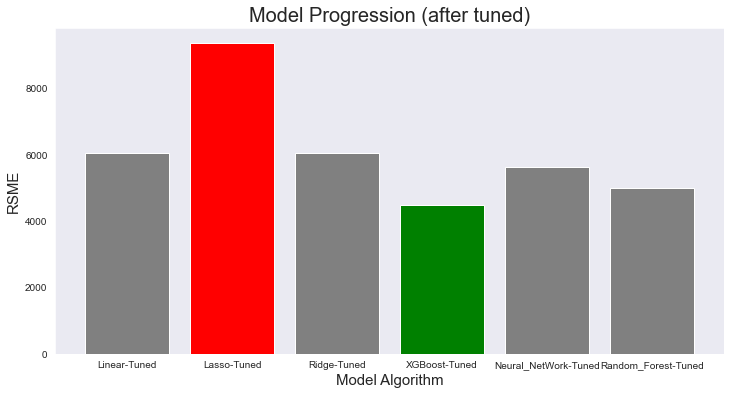

In [62]:
rsmeT, ax = plt.subplots(figsize=(12,6))
sns.set_style("dark")

ax.bar(rsme_tuned.index, rsme_tuned['RSME'], color=["grey", "red", "grey", "green", "grey",'grey'])
plt.title('Model Progression (after tuned)', size=20)
plt.xlabel('Model Algorithm', size=15)
plt.ylabel('RSME', size=15);

Final Model is untuned Random Forest Regressor

In [83]:
X_train_TLss, X_test_TLss, y_train_TLss, y_test_TLss = train_test_split(X, y, test_size=0.01, random_state=42)
# plt.scatter(X_test_TLss, y_test_TLss)
len(X_test_TLss), len(y_test_TLss), X_test_TLss.shape, y_test_TLss.shape

(1511, 1511, (1511, 154), (1511,))

In [75]:
X_train

,year,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
294116,-1.433108,0.323272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
271587,-0.316494,-0.613622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
191096,-0.316494,0.013534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142008,1.470089,-1.148295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
249951,0.130152,-0.439614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341748,-0.986463,0.568482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
293771,-0.093171,0.039345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
374010,0.353475,0.233229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
416449,0.576798,0.043191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [73]:
# from statsmodels.formula.api import ols

# formula = 'price ~ + year + C(manufacturer) + C(condition) + C(cylinders) + C(fuel) + odometer + C(title_status) + C(transmission) + C(type) + C(state)'

# model_ols = ols(formula=formula, data=cars_df).fit()
# model_summary = model_ols.summary()
# model_summary